# Hierarchical clustering with 2D toy datasets
***
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

In [14]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
import seaborn
plt.style.use('ggplot')

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [15]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 42

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

In [16]:
# 設定群集與繪圖參數
default_base = {'n_neighbors': 10, 'n_clusters': 3}
datasets = [('noisy_moons', noisy_moons, {'n_clusters': 2}),
            ('blobs', blobs, {}),
            ('no_structure', no_structure, {})]

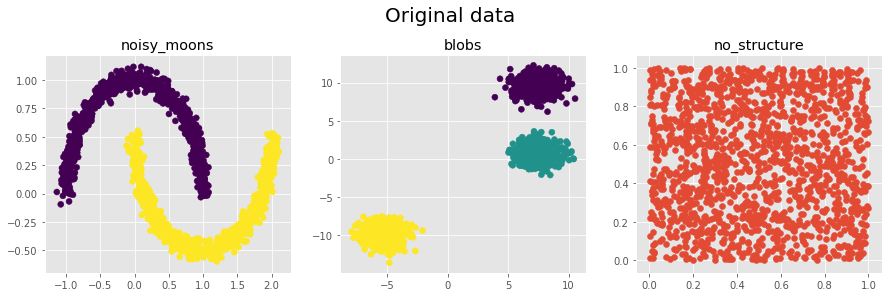

In [17]:
fig, axes = plt.subplots(1, len(datasets), figsize=(5*len(datasets), 4))
for ax, (title, dataset, algo_params) in zip(axes.ravel(), datasets):
    ax.scatter(dataset[0][:, 0], dataset[0][:, 1], c=dataset[1])
    ax.set_title(title)
    plt.suptitle('Original data', y=1.05, fontsize=20)

# 作業
* 試著完成剩下三種 2D 樣板資料的繪圖, 並觀察有何不同

In [18]:
def cluster_plot(default_base, title, datasets, algo_params):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    params = default_base.copy()
    params.update(algo_params)
    data, target = dataset
    data = StandardScaler().fit_transform(data)
    
    # algorithms
    alg = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'])
    ward, complete, average = alg, alg, alg
    clustering_algorithms = (
        ('Average Linkage', average, 'average'),
        ('Complete Linkage', complete, 'complete'),
        ('Ward Linkage', ward, 'ward'))
    
    for ax, (name, algorithm, linkage) in zip(axes.ravel(), clustering_algorithms):
        # change parameters
        algorithm.set_params(linkage=linkage)
        
        t0 = time.time()
        algorithm.fit(data)
        t1 = time.time()
        
        if hasattr(algorithm, 'labels_'):
            labels = algorithm.labels_.astype(np.int)
        else:
            labels = algorithm.predict(data)
            
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(labels) + 1))))
        ax.scatter(data[:, 0], data[:, 1], s=10, c=colors[labels])
        ax.set_title(name)
        ax.text(.99, 0, ('%.2fs' % (t1 - t0)).lstrip('0'),
                transform=ax.transAxes, size=13, horizontalalignment='right')
        plt.suptitle(f'Data: {title}', y=1.05, fontsize=20)
    plt.show()

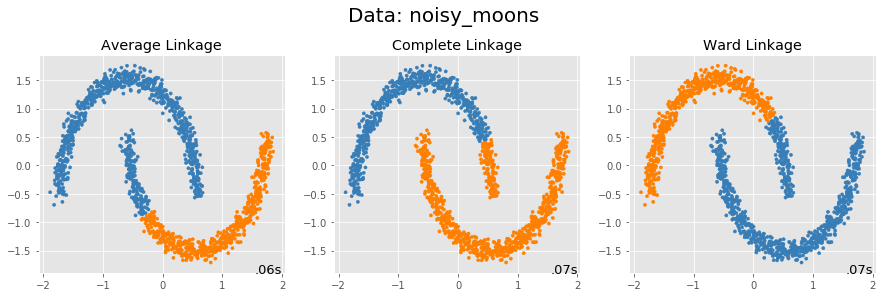

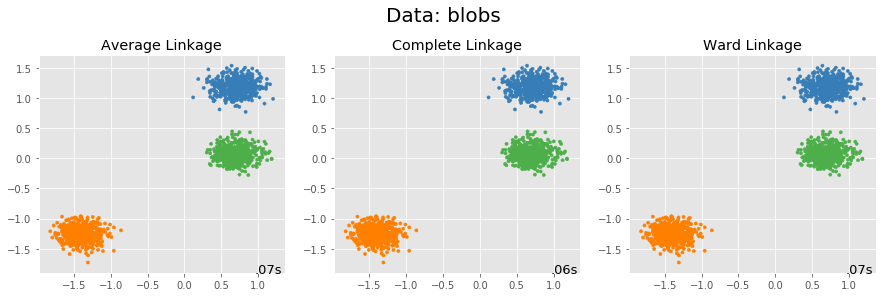

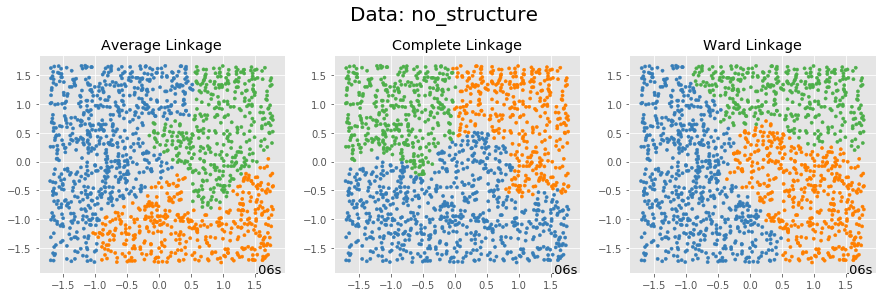

In [19]:
for (title, dataset, algo_params) in datasets:
    cluster_plot(default_base=default_base, title=title, datasets=dataset, algo_params=algo_params)